## Homework 2 Solution Template
### CSCI 4270 / 6270
### Due: February 5, 2024

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

## Problem 1

In [5]:
def print_matrix(name, A):
    print(f'Matrix {name}:')
    for i in range(A.shape[0]):
        row = A[i, :]
        print(f'{row[0]:.1f}', end='')
        for j in range(1, row.shape[0]):
            print(f', {row[j]:.1f}', end='')
        print()

In [6]:
def p1_camera(params, points):
    rx, ry, rz = np.radians(params[0])
    tx, ty, tz = params[1]
    f, d, ic, jc = params[2]

    #compute full rotational matrix for all 3 directions and save as R
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(rx), -np.sin(rx)],
        [0, np.sin(rx), np.cos(rx)]
    ])
    Ry = np.array([
        [np.cos(ry), 0, np.sin(ry)],
        [0, 1, 0],
        [-np.sin(ry), 0, np.cos(ry)]
    ])
    Rz = np.array([
        [np.cos(rz), -np.sin(rz), 0],
        [np.sin(rz), np.cos(rz), 0],
        [0, 0, 1]
    ])
    R = Rx @ Ry @ Rz
    print_matrix("R",R)

    #micron to mm
    d /= 1000
    K = np.array([
        [f/d,0,jc],
        [0,f/d,ic],
        [0,0,1]
    ])
    print_matrix("K",K)

    #build full M by adding translation to rotation matrix and using K to mult R
    t = np.array([tx,ty,tz]).reshape(3, 1)
    Rt = np.hstack((R.T, -R.T @ t))
    M = K @ Rt
    print_matrix("M", M)

    #build homogenous coords:
    hc = np.hstack((points, np.ones((len(points), 1))))

    #multiplies M with transpose of homog coords for u' v' and w'
    primeCoords = M @ hc.T

    #create u,v coord matrices using prime coords
    U = primeCoords[0]/primeCoords[2]
    V = primeCoords[1]/primeCoords[2]
    
    #stores the index depending on visibility for after the loop
    visible = []
    invis = []

    for i in range(len(points)):
        InOut = "inside" if (U[i] >= 0 and U[i] <= 4000 and V[i] >= 0 and V[i] <= 6000) else "outside"
        print(f"{i}: point {points[i][0]:.1f} {points[i][1]:.1f} {points[i][2]:.1f} ==> {V[i]:.1f}, {U[i]:.1f}, {InOut}")
        if primeCoords[2][i]>0:
            visible.append(i)
        else:
            invis.append(i)

    print("visible: ", end = "")
    for v in visible:
        print(v,end =" ")
    print("\nhidden: ", end=" ")
    for v in invis:
        print(v,end =" ")

In [7]:
"""
Problem 1, Test 1. This is a very simple test that could be easily checked by hand.
"""
params = [
    [0.0, 0.0, 0.0], 
    [0.0, 0.0, 10.0],
    [15, 10, 2001, 2995]
]
points = [
    [10, 5, 100],
    [0, 0, 0.5],
    [-30, 10, -20],
    [20, 15, 20]
]

p1_camera(params, points)


Matrix R:
1.0, 0.0, 0.0
0.0, 1.0, 0.0
0.0, 0.0, 1.0
Matrix K:
1500.0, 0.0, 2995.0
0.0, 1500.0, 2001.0
0.0, 0.0, 1.0
Matrix M:
1500.0, 0.0, 2995.0, -29950.0
0.0, 1500.0, 2001.0, -20010.0
0.0, 0.0, 1.0, -10.0
0: point 10.0 5.0 100.0 ==> 2084.3, 3161.7, inside
1: point 0.0 0.0 0.5 ==> 2001.0, 2995.0, inside
2: point -30.0 10.0 -20.0 ==> 1501.0, 4495.0, outside
3: point 20.0 15.0 20.0 ==> 4251.0, 5995.0, outside
visible: 0 3 
hidden:  1 2 

In [5]:
'''
Problem 1, Test 2
'''
params = [
    [15.0, -45.0, 10.0],
    [4.0, 30.0, 10.0],
    [12, 12, 1998, 3005]
]
points = [
    [100, 15, 90],
    [-100, 800, 1500],
    [10, -500, -500],
    [-30, 10, 20]
]
p1_camera(params, points)


Matrix R:
0.7, -0.1, -0.7
-0.0, 1.0, -0.2
0.7, 0.1, 0.7
Matrix K:
1000.0, 0.0, 3005.0
0.0, 1000.0, 1998.0
0.0, 0.0, 1.0
Matrix M:
-1428.5, -562.5, 2770.0, -5112.7
-1535.6, 617.4, 1500.9, -27388.2
-0.7, -0.2, 0.7, 1.5
Projections:
0: point 100.0 15.0 90.0 ==> 3487.2, -8851.4, outside
1: point -100.0 800.0 1500.0 ==> 3021.6, 4043.8, inside
2: point 10.0 -500.0 -500.0 ==> 4311.3, 4394.6, outside
3: point -30.0 10.0 20.0 ==> 1589.0, 2534.4, inside
visible: 1 3
hidden: 0 2


In [70]:
'''
Problem 1, Test 3
'''
params = [
    [-16.0, 10.0, 50.0],
    [25, -12, 50],
    [9, 9, 1000, 1400]
]
points = [
    [100, 15, 90],
    [-100, 800, 1500],
    [10, -500, -500],
    [-30, 10, 20]    
]
p1_camera(params, points)

Matrix R:
0.6, -0.8, 0.2
0.7, 0.7, 0.3
-0.3, -0.0, 0.9
Matrix K:
1000.0, 0.0, 1400.0
0.0, 1000.0, 1000.0
0.0, 0.0, 1.0
Matrix M:
876.1, 1085.6, 1006.9, -59219.4
-580.8, 926.0, 897.4, -19236.6
0.2, 0.3, 0.9, -48.4
0: point 100.0 15.0 90.0 ==> 297.8, 2323.9, inside
1: point -100.0 800.0 1500.0 ==> 1352.8, 1420.4, inside
2: point 10.0 -500.0 -500.0 ==> 1428.5, 1672.5, inside
3: point -30.0 10.0 20.0 ==> -794.1, 1704.6, outside
visible: 0 1 
hidden:  2 3 

## Problem 2

In [1]:
def load_points(fn):
    '''
    Input: a path to a file containing x, y points, one point per line.
    Returns: two-d np array where each row contains an x, y point
    '''
    f = open(fn, 'r')
    pts = []
    for line in f:
        line = line.strip().split()
        x, y = float(line[0]), float(line[1])
        pts.append([x, y])
    pts = np.array(pts)
    f.close()
    return pts

In [39]:
def p2_ransac(fn, samples, tau, seed):
    points = load_points(fn)
    np.random.seed(seed)


    maxInLine = 0 #used to check how many points fall within tau
    bestLine = (None, None, None)   #used for abc when a better line is found
    bestInLine = None               #holds coords inside of bound of best line
    bestOutLine = None              #holds coords outside of bound of best line

    for i in range(samples):
        sample = np.random.randint(0, len(points), 2) 
        if sample[0] == sample[1]:
            continue
        p1 = points[sample[0]]
        p2 = points[sample[1]]


        #calculating line of two points in standard form
        #based on https://math.stackexchange.com/questions/422602/convert-two-points-to-line-eq-ax-by-c-0
        a = p2[1] - p1[1]
        b = p1[0] - p2[0]
        c = p2[0] * p1[1] - p1[0] * p2[1]

        norm = np.sqrt(a**2 + b**2)
        a, b, c = a/norm , b/norm, c/norm
        if c > 0:
            a, b, c = -a, -b, -c


        #matrix holding points depending on relationship to the line
        inLine = points[np.abs(a*points[:,0] + b*points[:,1] + c)<tau]
        outLine = points[np.abs(a*points[:,0] + b*points[:,1] + c)>=tau]

        if len(inLine)>maxInLine:
            maxInLine = len(inLine)
            bestLine = (a,b,c)
            bestInLine = inLine
            bestOutLine = outLine
            print(f"Sample {i}:\nindices ({sample[0]},{sample[1]})")
            print(f"line ({a:.3f},{b:.3f},{c:.3f})")
            print("inliners", maxInLine, end = "\n\n")


    #calculate averages for the best line
    distanceInLine = np.abs(bestInLine[:,0]*bestLine[0] + bestInLine[:,1]*bestLine[1] + bestLine[2])
    distanceOutLine = np.abs(bestOutLine[:,0]*bestLine[0] + bestOutLine[:,1]*bestLine[1] + bestLine[2])
    print(f"avg inlier dist {np.mean(distanceInLine):.3f}")
    print(f"avg outlier dist {np.mean(distanceOutLine):.3f}")


In [40]:
'''
Problem 2, Test 1
'''
fn = 'data/p2_pts1_in.txt'
samples = 25
tau = 2.5
seed = 999
p2_ransac(fn, samples, tau, seed)


Sample 0:
indices (0,28)
line (-0.983,0.184,-26.286)
inliners 13

Sample 3:
indices (27,25)
line (0.426,0.905,-4.913)
inliners 19

Sample 10:
indices (23,4)
line (0.545,0.838,-0.944)
inliners 21

avg inlier dist 0.739
avg outlier dist 8.920


In [41]:
'''
Problem 2, Test 2
'''
fn = 'data/p2_pts2_in.txt'
samples = 35
tau = 3.0
seed = 1232
p2_ransac(fn, samples, tau, seed)


Sample 0:
indices (6,15)
line (-0.023,-1.000,-19.478)
inliners 16

Sample 2:
indices (46,20)
line (0.178,-0.984,-11.491)
inliners 21

Sample 4:
indices (75,52)
line (0.500,0.866,-0.018)
inliners 30

Sample 17:
indices (58,18)
line (-0.408,-0.913,-1.201)
inliners 35

avg inlier dist 1.383
avg outlier dist 10.267


## Problem 3 (4270 Only)

Students in 6270 should delete Problem 3 cells from their notebooks prior to submission.

In [42]:
'''
Utility for Problem 3
'''
import os

def get_images(img_dir):
    start_cwd = os.getcwd()
    os.chdir(img_dir)
    img_name_list = os.listdir('./')
    img_name_list = [name for name in img_name_list if 'jpg' in name.lower()]
    img_name_list.sort()

    img_list = []
    for i_name in img_name_list:
        im = cv2.imread(i_name, cv2.IMREAD_GRAYSCALE)
        if im is None:
            print('Could not open', i_name)
            sys.exit(0)
        img_list.append(im)

    os.chdir(start_cwd)
    return img_name_list, img_list

In [57]:
def p3_best_focus(image_dir):
    img_name_list, img_list = get_images(image_dir)

    #vars for best focused image
    maxEnergy = 0
    maxName = None

    for i in range(len(img_name_list)):
        im_dx = cv2.Sobel(img_list[i], cv2.CV_32F, 1, 0)
        im_dy = cv2.Sobel(img_list[i], cv2.CV_32F, 0, 1)
        gradientMag = im_dx**2 + im_dy**2
        energy = np.mean(gradientMag)   #for the 1/MN

        if energy > maxEnergy:
            maxEnergy = energy
            maxName = img_name_list[i]

        print(f"{img_name_list[i]} {energy:.1f}")
    print(f"Image {maxName} is best focused.")


In [55]:
image_dir = 'data/evergreen'
p3_best_focus(image_dir)

DSC_1696.JPG 283.9
DSC_1697.JPG 312.7
DSC_1698.JPG 602.4
DSC_1699.JPG 2137.2
DSC_1700.JPG 10224.8
DSC_1701.JPG 18987.1
Image DSC_1701.JPG is best focused.


In [56]:
image_dir = 'data/branches'
p3_best_focus(image_dir)

DSC_1702.JPG 132.4
DSC_1703.JPG 1152.0
DSC_1704.JPG 8229.7
DSC_1705.JPG 41206.5
DSC_1706.JPG 22214.3
DSC_1707.JPG 7876.5
Image DSC_1705.JPG is best focused.


## Problem 4 (6270 Only)

Students in 4270 should delete Problem 4 cells from their notebooks prior to submission.

In [15]:
'''
Utility for Problem 4
'''
import os

def get_images(img_dir):
    start_cwd = os.getcwd()
    os.chdir(img_dir)
    names = os.listdir('./')
    names = [name for name in names if 'jpg' in name.lower()]
    names.sort()

    images = []
    for n in names:
        im = cv2.imread(n)
        im = im.astype(np.float32)
        if im is None:
            print('Could not open', n)
            sys.exit(0)
        images.append(im)

    os.chdir(start_cwd)
    return names, images


In [16]:
def p4_sharp_focus(image_dir, sigma, p):



Energies at (300, 208)
0: 2817.9
1: 2578.0
2: 2384.7
3: 2461.7
4: 2423.4
5: 2438.2
RGB: 141, 139, 137

Energies at (300, 417)
0: 100.1
1: 1244.4
2: 3139.1
3: 3286.9
4: 1391.8
5: 1610.1
RGB: 204, 228, 188

Energies at (600, 208)
0: 81.4
1: 1099.8
2: 3137.7
3: 3312.0
4: 1771.9
5: 1676.1
RGB: 110, 91, 88

Energies at (600, 417)
0: 4792.0
1: 291.2
2: 109.3
3: 123.4
4: 96.2
5: 88.3
RGB: 34, 34, 36


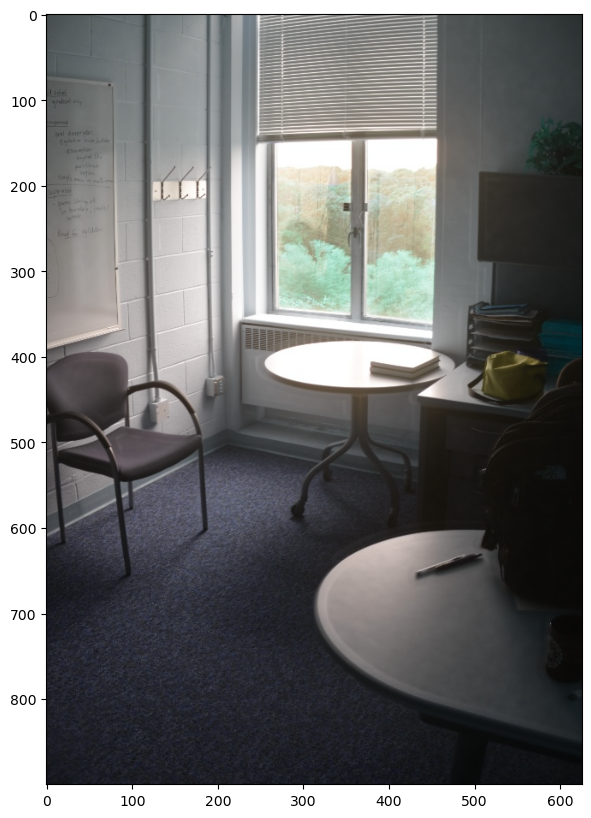

In [17]:
image_dir = 'data/office'
sigma = 3.0
p = 2
p4_sharp_focus(image_dir, sigma, p)

In [ ]:
image_dir = 'data/branches'
sigma = 5.0
p = 2
p4_sharp_focus(image_dir, sigma, p)

## Problem 4 Discussion

[ replace with your discussion write-up ]